In [1]:
import sys
import os

# Get the root directory of the project
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the root directory to the system path
sys.path.insert(0, project_root)

# Now you can import watermarking.utils
import watermarking.utils as utils

In [2]:
import pandas as pd 
import os
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
nr_keys = 20
data_dir = "../data/output/different_keys_detected"
files_to_parse = os.listdir(data_dir)

def skip_file(filename, filters):
    # File must contain all filters to be processed
    for f in filters:
        if f not in filename:
            return True
    return False

def get_data(filters):
    data = []
    for file in files_to_parse:
        if skip_file(file, filters):
            continue
            
        print(file)
        filename = os.path.join(data_dir, file)
        with open(filename) as f:
            file_data = f.read()
            all_data = json.loads(file_data)
            data.append(all_data[:nr_keys * 1000])
    return [row for each_list in data[:nr_keys] for row in each_list]

def label_keys(df):
    unique_keys = df["generated_watermark_key"].unique().tolist()
    unique_labels = [chr(ord("A") + x) for x in range(len(unique_keys))]
    # Create following dict: {"key1": "A", "key2": "B", ...}
    key_label_dict = {k: v for k, v in zip(unique_keys, unique_labels)}
    
    for column_name in "generated_watermark_key", "detected_watermark_key":
        df[column_name + "_label"] = df[column_name].apply(lambda x: key_label_dict.get(x, None))
    
def get_df(*filters):
    data = get_data(filters)
    df = pd.DataFrame(data)
    df = df.rename(columns={"detected_seed": "detected_watermark_key", 
                       "generated_seed": "generated_watermark_key"}
                  )
    label_keys(df)
    return df

df = get_df("czech")
df

czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_23:13:45.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_23:46:14.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_22:08:48.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_22:41:17.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-23_00:51:14.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_21:36:11.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-23_00:18:45.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_21:03:01.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_19:56:50.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_20:29:55.json


,z_score,p_value,error,generated_green_list_size,generated_wm_strength,generated_watermark_key,detected_green_list_size,detected_wm_strength,detected_watermark_key,generated_grSSSeen_list_size,generated_watermark_key_label,detected_watermark_key_label
0,16.211786,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
1,18.443793,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
2,12.963168,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
3,18.704052,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
4,16.245539,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,13.457356,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J
99996,10.328783,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J
99997,14.332286,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J
99998,15.385755,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J


In [4]:
def plot_boxplot(df):
    plt.figure(figsize=(12, 6)) 
    df = df.sort_values(by=['detected_watermark_key_label', 'generated_watermark_key_label'])
    ax = sns.boxplot(df, x="detected_watermark_key_label", y="z_score", hue="generated_watermark_key_label",
               showfliers=False)
    ax.set_xlabel("detected with wm key")
    ax.legend(title="generated with wm key")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_23:13:45.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_23:46:14.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_22:08:48.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_22:41:17.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-23_00:51:14.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_21:36:11.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-23_00:18:45.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_21:03:01.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_19:56:50.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_20:29:55.json


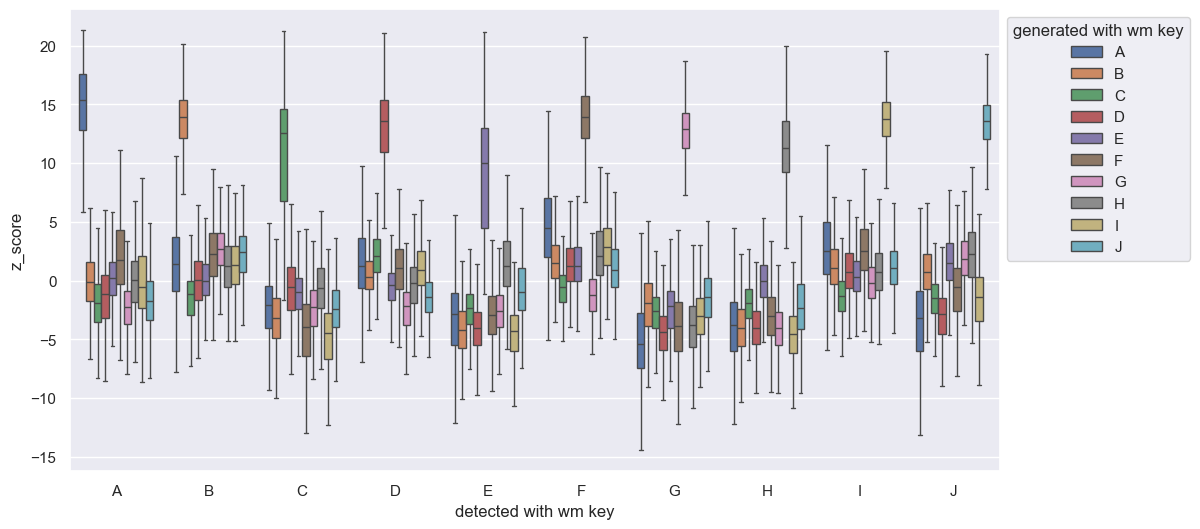

In [5]:
plot_boxplot(get_df("czech", "UnigramWatermarkedLLM"))

english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_23:11:28.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_19:46:26.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_22:42:18.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_20:45:15.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_19:16:54.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_23:40:38.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_21:43:55.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_21:14:37.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_20:15:51.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_22:13:07.json


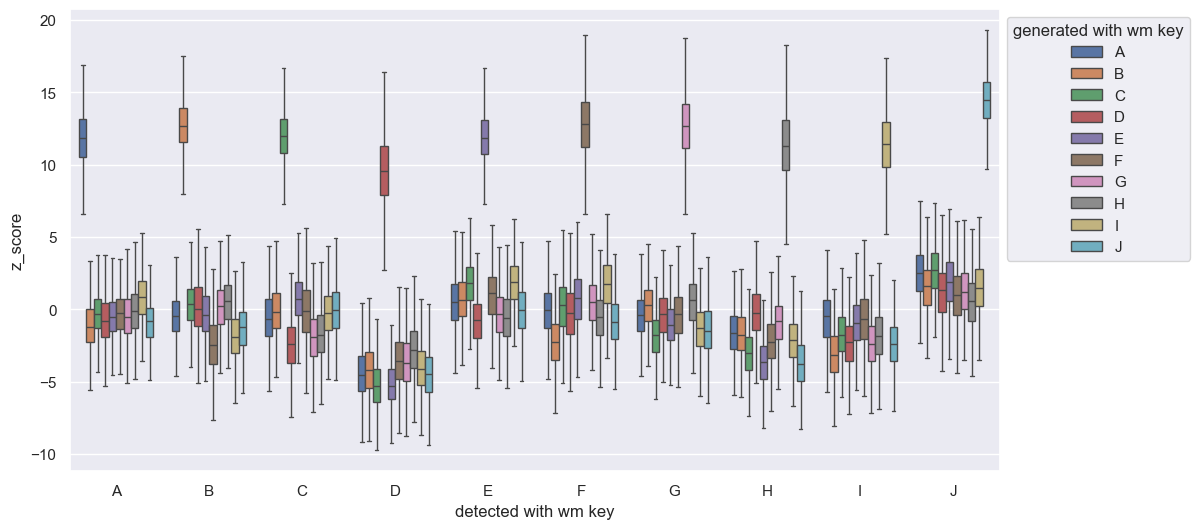

In [6]:
plot_boxplot(get_df("english", "UnigramWatermarkedLLM"))

english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_8~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_0~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_4~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_7~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_9~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_2~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_1~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_6~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_3~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_5~tau_0.2.json


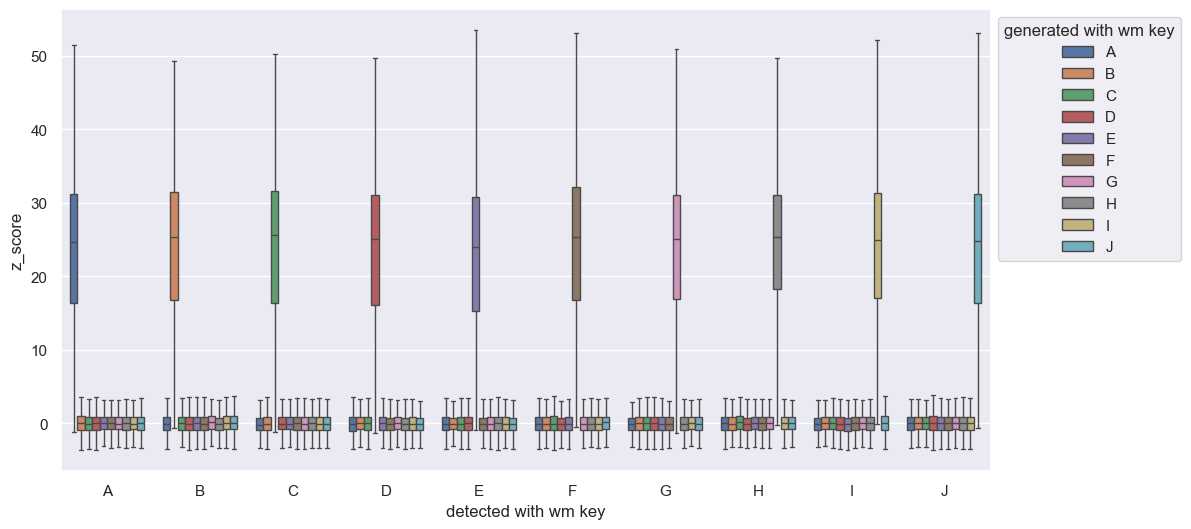

In [7]:

plot_boxplot(get_df("english", "GumbelNGramWatermarkedLLM", "tau_0.2"))

english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_8~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_6~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_9~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_7~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_5~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_2~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_1~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_3~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_0~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_4~tau_0.3.json


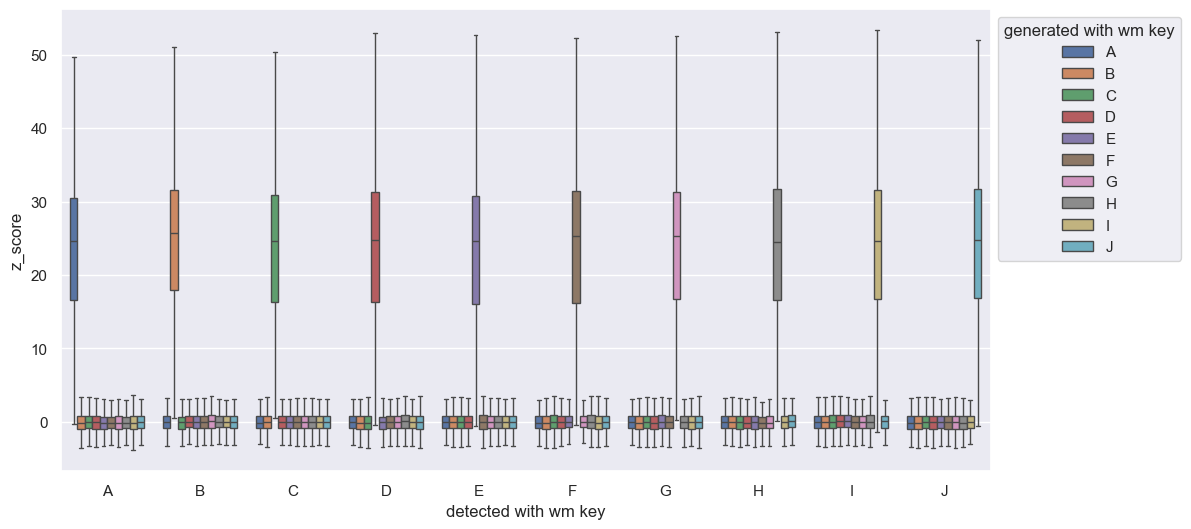

In [8]:

plot_boxplot(get_df("english", "GumbelNGramWatermarkedLLM", "tau_0.3"))